In [22]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
sns.set(style="whitegrid")


Load Scaled Features

In [23]:
features = joblib.load("../artifacts/customer_features.pkl")
features_scaled = joblib.load("../artifacts/customer_features_scaled.pkl")

print("Features shape:", features_scaled.shape)


Features shape: (4338, 4)


Elbow Method (Choosing K)

In [24]:
inertia =[]
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


Elbow Method (Choosing K)

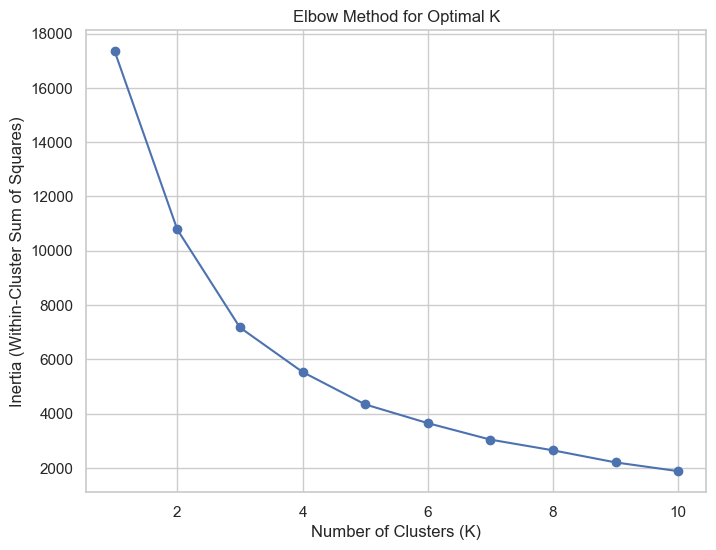

In [25]:
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

Train Final KMean model

In [26]:
kmean_final = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmean_final.fit_predict(features_scaled)
clusters


array([3, 0, 0, ..., 0, 0, 0], shape=(4338,), dtype=int32)

In [27]:
customer_df = joblib.load("../artifacts/customer_raw.pkl")

customer_df["Cluster"] = clusters
customer_df.head()


,CustomerID,Recency,Frequency,MonetaryValue,TotalQuantity,Cluster
0,12346.0,325,1,77183.60,74215,3
1,12347.0,1,7,4310.00,2458,0
2,12348.0,74,4,1797.24,2341,0
3,12349.0,18,1,1757.55,631,0
4,12350.0,309,1,334.40,197,2


Cluster Size Distribution

In [28]:
customer_df["Cluster"].value_counts()


Cluster
0    3204
2    1079
3      48
1       7
Name: count, dtype: int64

Cluster Profiling

In [29]:
cluster_profile = customer_df.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "MonetaryValue": "mean",
    "TotalQuantity": "mean"
})

cluster_profile

,Recency,Frequency,MonetaryValue,TotalQuantity
Cluster,,,,
0,40.781835,4.466604,1677.095809,991.417291
1,5.714286,65.428571,184143.690000,89650.428571
2,246.140871,1.581094,520.055478,267.630213
3,16.541667,42.854167,35163.484167,22395.520833


Visualize Clusters (2D Projection)

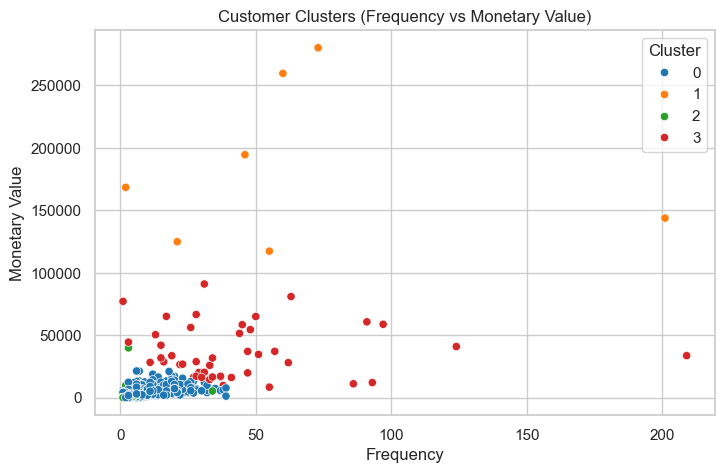

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=customer_df["Frequency"],
    y=customer_df["MonetaryValue"],
    hue=customer_df["Cluster"],
    palette="tab10"
)

plt.title("Customer Clusters (Frequency vs Monetary Value)")
plt.xlabel("Frequency")
plt.ylabel("Monetary Value")
plt.legend(title="Cluster")
plt.show()


In [31]:
joblib.dump(kmean_final, "../artifacts/kmeans_model.pkl")
joblib.dump(customer_df, "../artifacts/customer_with_clusters.pkl")

print("K-Means model and clustered data saved")


K-Means model and clustered data saved
